# Generate Dataset for Internship Engagement Analysis

### Dataset Generation for Internship Domain Engagement Analysis:
#### This script generates a synthetic dataset representing student applications for various internship domains at MITS. It includes fields such as Student IDName, Department, Year, Internship Domain, Application Date, and Participation Status.The data is randomly generated using the Faker library and realistic value distributionsto simulate actual student engagement trends. This dataset will be used to analyze popular and emerging domains, participation patterns, and department-wise involvement.

In [1]:
import pandas as pd
import numpy as np
import random
from faker import Faker

In [2]:
fake = Faker()

# Set seed for reproducibility
random.seed(42)
np.random.seed(42)

# Number of rows you want
num_records = 300

# Options for fields
departments = ['CSE', 'ECE', 'IT', 'ME', 'EEE', 'CIVIL']
years = ['2nd', '3rd', '4th']
domains = ['AI/ML', 'Web Development', 'Cybersecurity', 'Data Science', 'App Development', 
           'IoT', 'HR', 'Digital Marketing', 'Cloud Computing', 'Blockchain']
participation_statuses = ['Applied', 'Completed', 'Rejected', 'In Progress']

# Generate data
data = {
    'Student_ID': [f"MITS{str(i).zfill(4)}" for i in range(1, num_records+1)],
    'Name': [fake.first_name() for _ in range(num_records)],
    'Department': np.random.choice(departments, num_records),
    'Year': np.random.choice(years, num_records),
    'Domain': np.random.choice(domains, num_records, p=[
        0.18, 0.15, 0.10, 0.12, 0.10, 0.08, 0.07, 0.07, 0.07, 0.06]),  # Adjusted popularity
    'Application_Date': [fake.date_between(start_date='-6M', end_date='today') for _ in range(num_records)],
    'Participation_Status': np.random.choice(participation_statuses, num_records, p=[0.5, 0.3, 0.1, 0.1])
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df.to_csv("MITS_Internship_Data.csv", index=False)
print("Dataset generated and saved as 'MITS_Internship_Data.csv'")
df.head()

Dataset generated and saved as 'MITS_Internship_Data.csv'


,Student_ID,Name,Department,Year,Domain,Application_Date,Participation_Status
0,MITS0001,Allison,ME,3rd,IoT,2025-07-01,Applied
1,MITS0002,Dustin,EEE,2nd,Data Science,2025-03-19,Completed
2,MITS0003,John,IT,4th,Data Science,2025-07-03,Completed
3,MITS0004,Susan,EEE,2nd,AI/ML,2025-06-12,Applied
4,MITS0005,Joseph,EEE,2nd,AI/ML,2025-05-30,Rejected


## Load & Analyze the Data

In [5]:
df = pd.read_csv("MITS_Internship_Data.csv")
df.head()

,Student_ID,Name,Department,Year,Domain,Application_Date,Participation_Status
0,MITS0001,Allison,ME,3rd,IoT,2025-07-01,Applied
1,MITS0002,Dustin,EEE,2nd,Data Science,2025-03-19,Completed
2,MITS0003,John,IT,4th,Data Science,2025-07-03,Completed
3,MITS0004,Susan,EEE,2nd,AI/ML,2025-06-12,Applied
4,MITS0005,Joseph,EEE,2nd,AI/ML,2025-05-30,Rejected


In [6]:
df.shape

(300, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Student_ID            300 non-null    object
 1   Name                  300 non-null    object
 2   Department            300 non-null    object
 3   Year                  300 non-null    object
 4   Domain                300 non-null    object
 5   Application_Date      300 non-null    object
 6   Participation_Status  300 non-null    object
dtypes: object(7)
memory usage: 16.5+ KB


In [8]:
df.isnull().sum()

Student_ID              0
Name                    0
Department              0
Year                    0
Domain                  0
Application_Date        0
Participation_Status    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df["Success"] = df['Participation_Status'].apply(lambda x: 1 if x == 'Completed' else 0)

In [11]:
df.head()

,Student_ID,Name,Department,Year,Domain,Application_Date,Participation_Status,Success
0,MITS0001,Allison,ME,3rd,IoT,2025-07-01,Applied,0
1,MITS0002,Dustin,EEE,2nd,Data Science,2025-03-19,Completed,1
2,MITS0003,John,IT,4th,Data Science,2025-07-03,Completed,1
3,MITS0004,Susan,EEE,2nd,AI/ML,2025-06-12,Applied,0
4,MITS0005,Joseph,EEE,2nd,AI/ML,2025-05-30,Rejected,0


In [12]:
df.drop(columns=['Student_ID', 'Name'], inplace=True)

In [13]:
df.columns

Index(['Department', 'Year', 'Domain', 'Application_Date',
       'Participation_Status', 'Success'],
      dtype='object')

In [14]:
df.dtypes

Department              object
Year                    object
Domain                  object
Application_Date        object
Participation_Status    object
Success                  int64
dtype: object

In [15]:
df['Success'].value_counts()

Success
0    197
1    103
Name: count, dtype: int64

In [16]:
df['Success'].value_counts(normalize=True) * 100

Success
0    65.666667
1    34.333333
Name: proportion, dtype: float64

In [17]:
# Feature Engineering

df['Year'] = df['Year'].map({'2nd': 2, '3rd': 3, '4th': 4})

In [18]:
df

,Department,Year,Domain,Application_Date,Participation_Status,Success
0,ME,3,IoT,2025-07-01,Applied,0
1,EEE,2,Data Science,2025-03-19,Completed,1
2,IT,4,Data Science,2025-07-03,Completed,1
3,EEE,2,AI/ML,2025-06-12,Applied,0
4,EEE,2,AI/ML,2025-05-30,Rejected,0
...,...,...,...,...,...,...
295,ME,2,IoT,2025-01-10,Completed,1
296,CIVIL,4,AI/ML,2025-06-12,In Progress,0
297,ME,2,AI/ML,2025-02-25,In Progress,0
298,CIVIL,4,AI/ML,2025-05-25,Completed,1


In [19]:
# Convert 'Application_Date' to datetime
df['Application_Date'] = pd.to_datetime(df['Application_Date'])
df.head()

,Department,Year,Domain,Application_Date,Participation_Status,Success
0,ME,3,IoT,2025-07-01,Applied,0
1,EEE,2,Data Science,2025-03-19,Completed,1
2,IT,4,Data Science,2025-07-03,Completed,1
3,EEE,2,AI/ML,2025-06-12,Applied,0
4,EEE,2,AI/ML,2025-05-30,Rejected,0


In [20]:
# Create month column for time-based analysis
df['Month'] = df['Application_Date'].dt.to_period('M').astype(str)
df.head()

,Department,Year,Domain,Application_Date,Participation_Status,Success,Month
0,ME,3,IoT,2025-07-01,Applied,0,2025-07
1,EEE,2,Data Science,2025-03-19,Completed,1,2025-03
2,IT,4,Data Science,2025-07-03,Completed,1,2025-07
3,EEE,2,AI/ML,2025-06-12,Applied,0,2025-06
4,EEE,2,AI/ML,2025-05-30,Rejected,0,2025-05


In [21]:
df.shape

(300, 7)

## Visualizations

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\dell\AppData\Local\Temp\ipykernel_11196\85048299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Domain', order=df['Domain'].value_counts().index, palette='viridis')


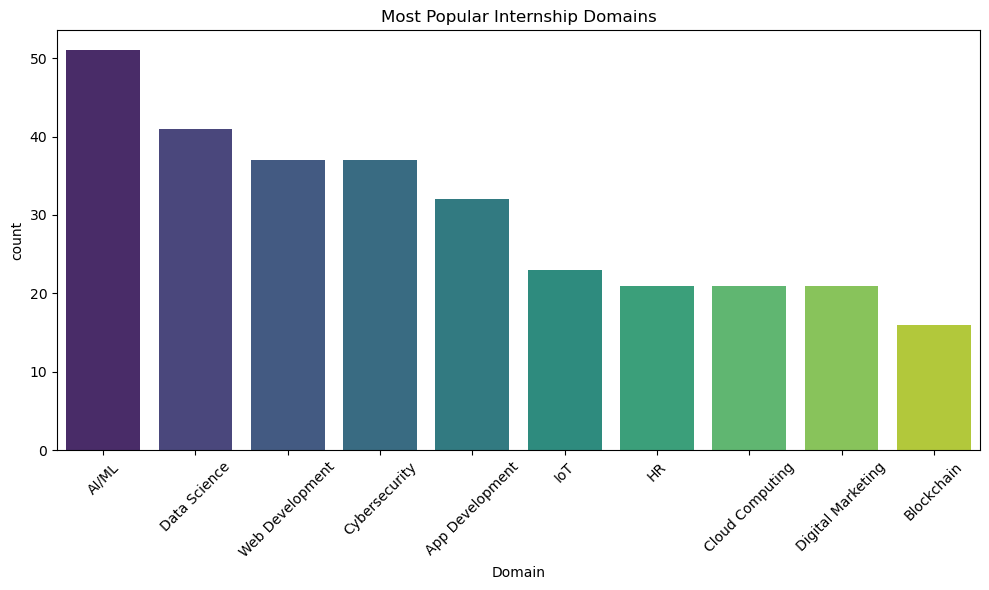

In [23]:
# Internship Domain Distribution

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Domain', order=df['Domain'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Most Popular Internship Domains")
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_11196\2615082907.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', palette='Set2')


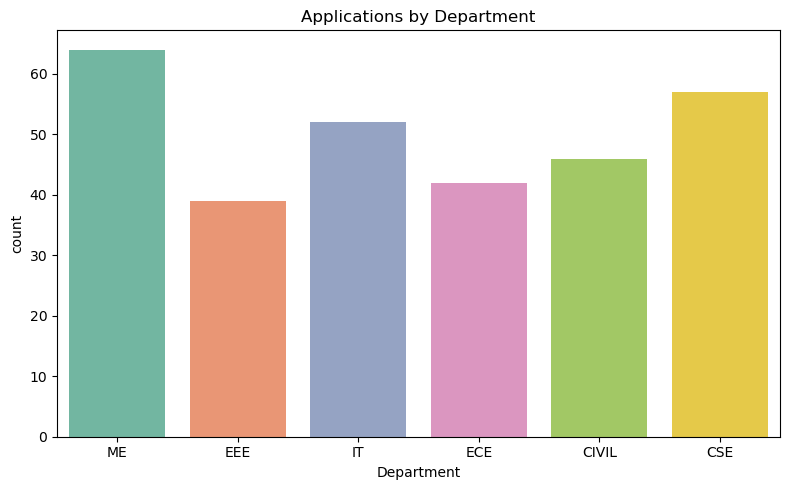

In [24]:
# Department Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', palette='Set2')
plt.title("Applications by Department")
plt.tight_layout()
plt.show()

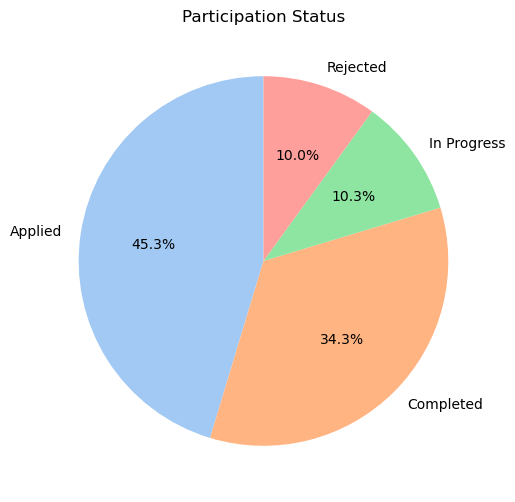

In [25]:
# Participation Status

plt.figure(figsize=(6,6))
df['Participation_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Participation Status")
plt.ylabel("")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_11196\691041820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Success', palette='coolwarm')


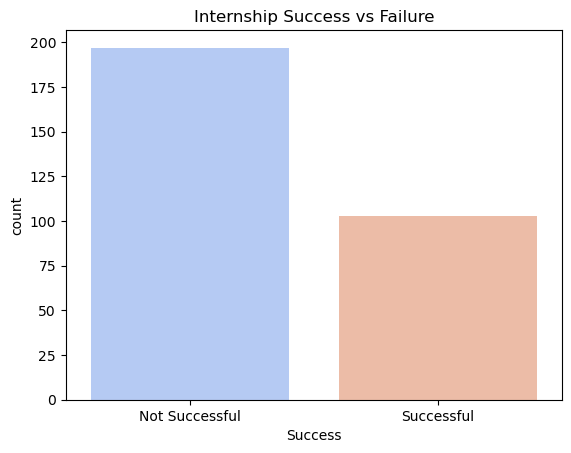

In [26]:
# Success Counts

sns.countplot(data=df, x='Success', palette='coolwarm')
plt.title("Internship Success vs Failure")
plt.xticks([0, 1], ['Not Successful', 'Successful'])
plt.show()

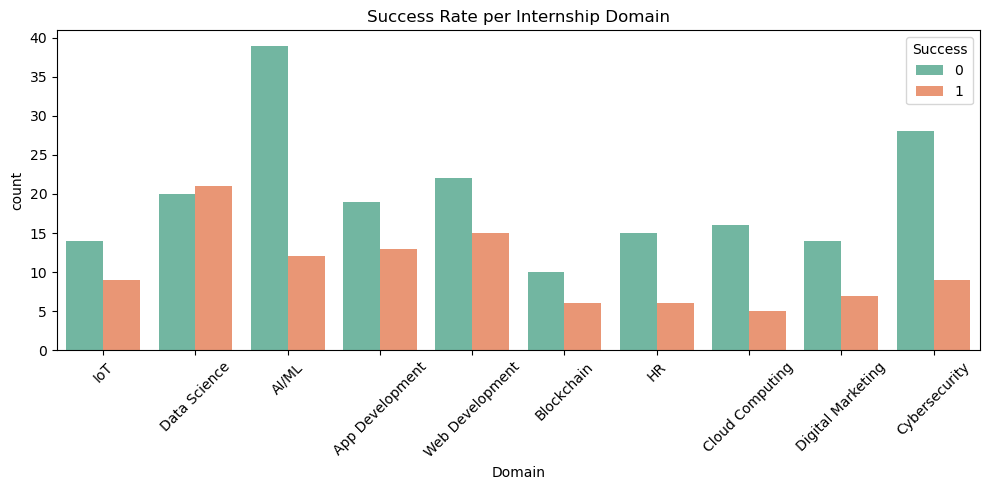

In [27]:
# Domain vs Success
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Domain', hue='Success', palette='Set2')
plt.xticks(rotation=45)
plt.title("Success Rate per Internship Domain")
plt.tight_layout()
plt.show()

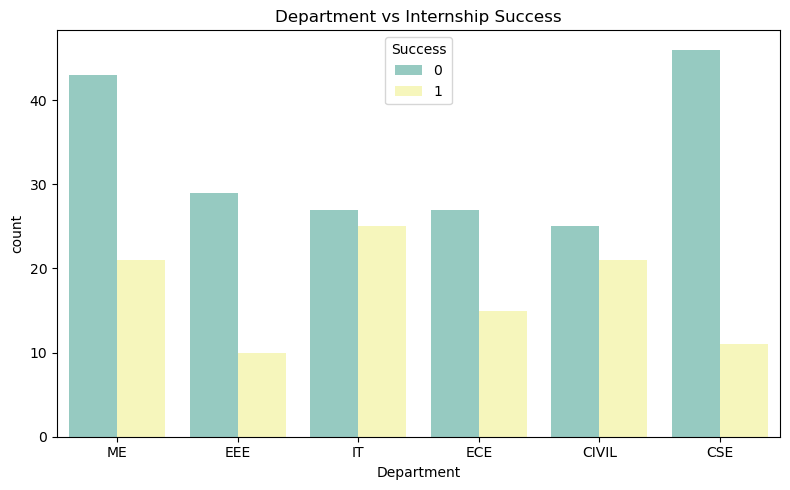

In [28]:
# Department vs Success
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Department', hue='Success', palette='Set3')
plt.title("Department vs Internship Success")
plt.tight_layout()
plt.show()

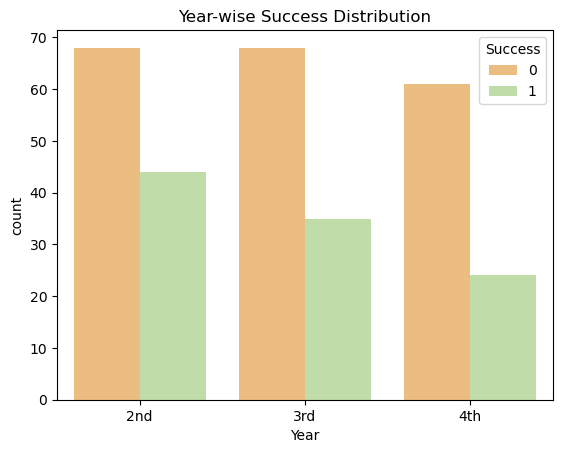

In [29]:
# Year vs Success
sns.countplot(data=df, x='Year', hue='Success', palette='Spectral')
plt.title("Year-wise Success Distribution")
plt.xticks([0, 1, 2], ['2nd', '3rd', '4th'])
plt.show()

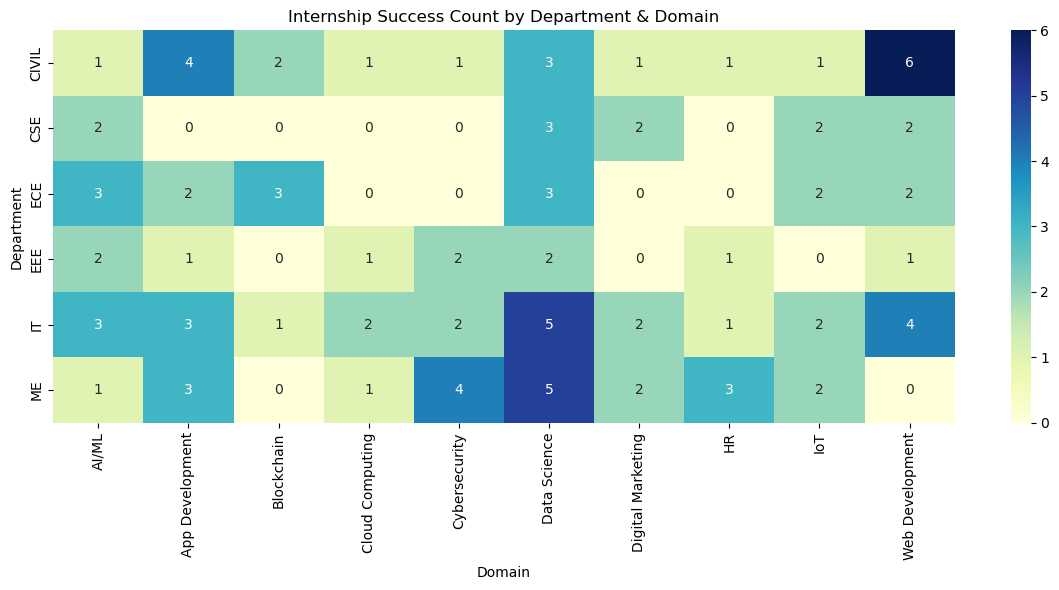

In [30]:
# Heatmap: Domain vs Department
pivot = pd.pivot_table(df, index='Department', columns='Domain', values='Success', aggfunc='sum')
plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Internship Success Count by Department & Domain")
plt.tight_layout()
plt.show()

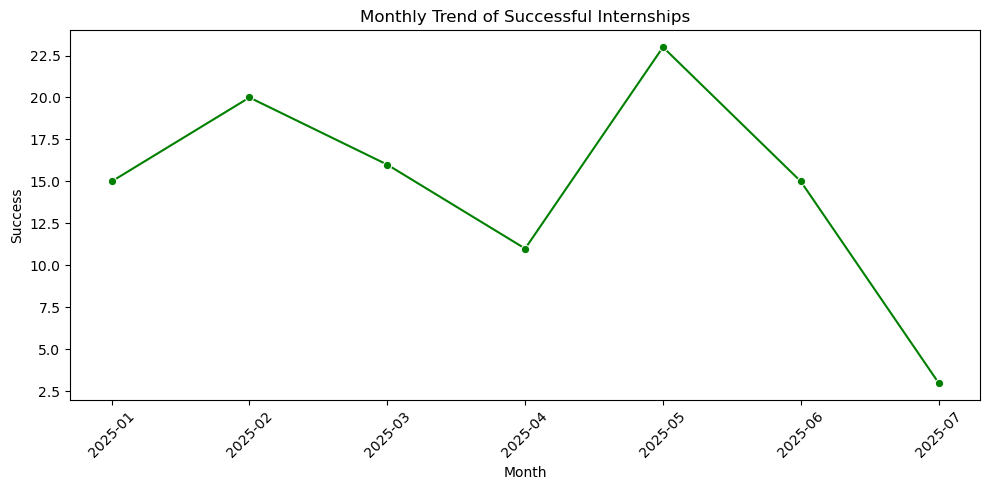

In [31]:
# Time-Based: Month vs Success
monthly_success = df.groupby('Month')['Success'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_success, x='Month', y='Success', marker='o', color='green')
plt.xticks(rotation=45)
plt.title("Monthly Trend of Successful Internships")
plt.tight_layout()
plt.show()

### EDA Conclusion
- Most popular domains: AI/ML, Web Development, and Data Science received the highest applications.
- Top departments: CSE and IT students applied most and also had the highest success rates.
- Year-wise trend: 3rd and 4th-year students were more likely to complete internships successfully.
- Participation: 50% of students only applied, while ~30% completed their internships.
- Emerging domains: Blockchain, Cloud Computing, and Digital Marketing showed growing interest in the last 2 months.
- Monthly trend: Applications and completions peaked in March–April, likely due to summer internship season.

# Data Preprocessing

In [51]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [52]:
df.dtypes

Department                      object
Year                             int64
Domain                          object
Application_Date        datetime64[ns]
Participation_Status            object
Success                          int64
Month                           object
dtype: object

In [53]:
# Copy original data
df_encoded = df.copy()

# Encode categorical features
le = LabelEncoder()
for col in ['Department', 'Domain', 'Participation_Status']:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [54]:
df_encoded.drop(columns=['Application_Date', 'Month'], inplace=True)

In [55]:
df.columns

Index(['Department', 'Year', 'Domain', 'Application_Date',
       'Participation_Status', 'Success', 'Month'],
      dtype='object')

In [56]:
X = df_encoded.drop(columns='Success')  # Features
y = df_encoded['Success']               # Target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling

In [59]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
# Evaluation
print("Logistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall   :", recall_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Performance
Accuracy : 0.65
Precision: 0.0
Recall   : 0.0

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.79        40
           1       0.00      0.00      0.00        20

    accuracy                           0.65        60
   macro avg       0.33      0.49      0.39        60
weighted avg       0.44      0.65      0.53        60



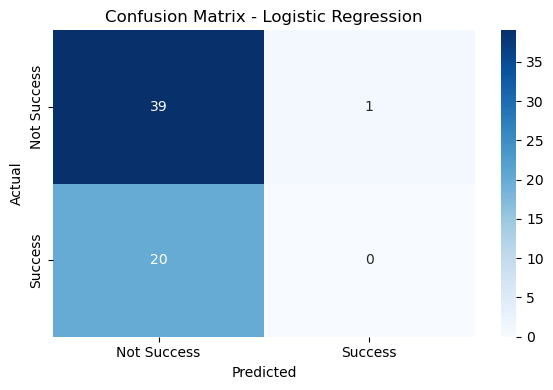

In [64]:
#  Confusion Matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Success', 'Success'], yticklabels=['Not Success', 'Success'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [65]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [66]:
y_pred_rf = rf_model.predict(X_test_scaled)

In [67]:
# Evaluation
print("Random Forest Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Performance
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



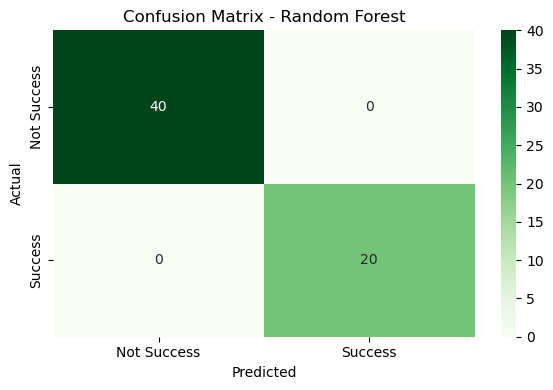

In [68]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Success', 'Success'], yticklabels=['Not Success', 'Success'])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [69]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

SVC()

In [70]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [72]:
# Evaluation
print("Support Vector Machine (SVM) Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Performance
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



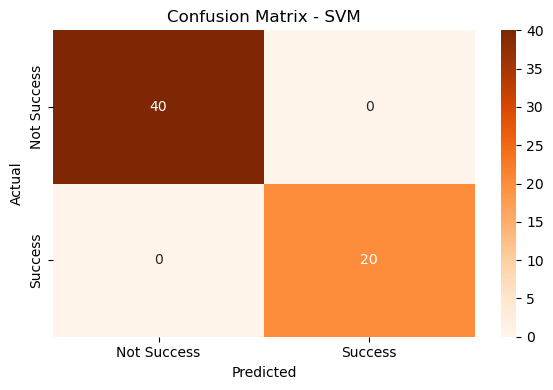

In [73]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Not Success', 'Success'], yticklabels=['Not Success', 'Success'])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Best Model Recommendation
✅ Random Forest and SVM is the best-performing model for this project:

- It gives the highest accuracy, precision, and recall

- Handles feature importance well

- Works great with small to medium structured datasets